# Simulation of Hi-C data

In [1]:
import sys
sys.path.insert(1, '/home/elinfi/MasterCode/clustering/class/')

In [2]:
import numpy as np
import cooltools.lib.plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import LogLocator, LogFormatterSciNotation
from simulate_data import SimulateData
from mid_point_log_norm import MidPointLogNorm

In [3]:
# globally set font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

## Initialization
Specify the **resolution** and **maximum range** of simulated matrix.

In [5]:
resolution = 32000
max_range = 1e7

In [6]:
simulation = SimulateData(resolution, max_range)

## Change TAD
Change interaction frequency of TAD according to own defined function.

In [7]:
print(simulation.tad_region)

chr8:56100000-56950000


In [8]:
def change(x):
    y = 2*x
    return y

In [9]:
simulation.change_tad(change)

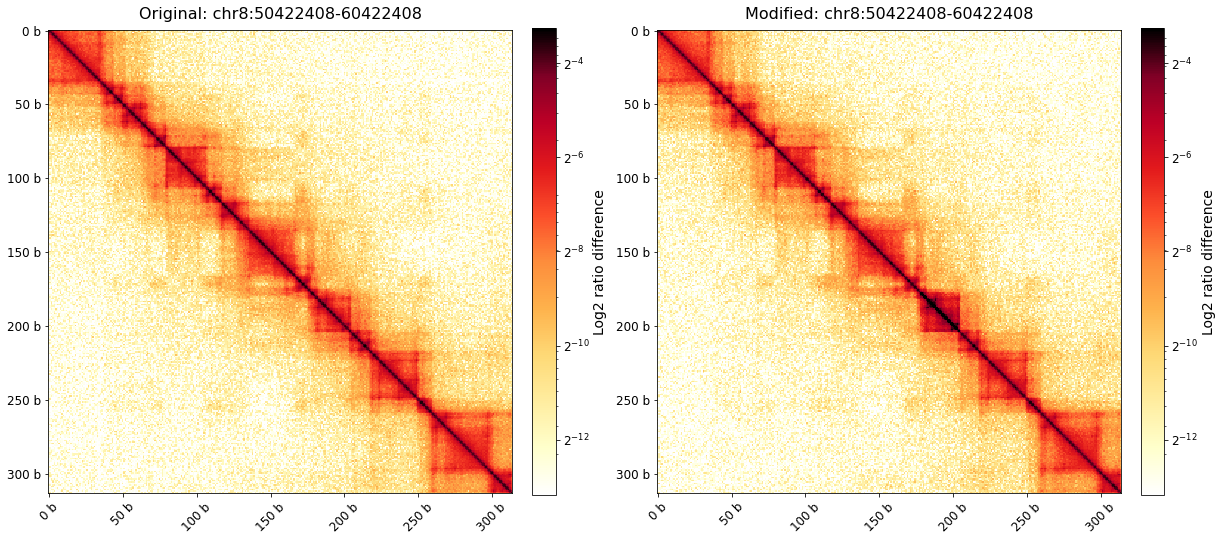

In [10]:
f, axs = plt.subplots(figsize=(20, 20),
                      nrows=1,
                      ncols=2,
                      sharex=True, sharey=False)
ax = axs[0]
norm = mpl.colors.LogNorm()
im = ax.matshow(simulation.mat1,
                cmap='fall',
                norm=norm)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Log2 ratio difference', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title('Original: ' + simulation.mat_region, y=1.01)
#plt.savefig('../Figures/sub_002_001.png')
format_ticks(ax)

ax = axs[1]
im = ax.matshow(simulation.mat2,
                cmap='fall',
                norm=norm)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Log2 ratio difference', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title('Modified: ' + simulation.mat_region, y=1.01)
#plt.savefig('../Figures/sub_002_001.png')
format_ticks(ax)

## Compare simulation matrices

### Ratio

In [11]:
method = 'ratio'
diff_ratio = simulation.compare(method=method)

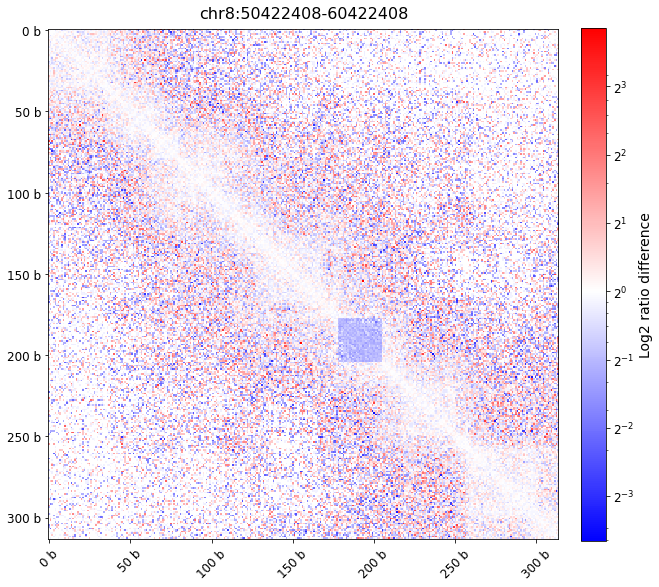

In [12]:
f, axs = plt.subplots(figsize=(10, 10),
                      nrows=1,
                      ncols=1,
                      sharex=True, sharey=False)
ax = axs
norm = MidPointLogNorm(midpoint=1)
#norm = mpl.colors.LogNorm()
im = ax.matshow(diff_ratio,
                cmap='bwr',
                norm=norm)
plt.colorbar(im, fraction=0.046, pad=0.04, label='Log2 ratio difference', ax=ax,
             ticks=LogLocator(base=2), format=LogFormatterSciNotation(base=2))
ax.set_title(simulation.mat_region, y=1.01)
#plt.savefig('../Figures/sub_002_001.png')
format_ticks(ax)

### Relative difference

In [13]:
method = 'reldiff'
diff_rel = simulation.compare(method=method)

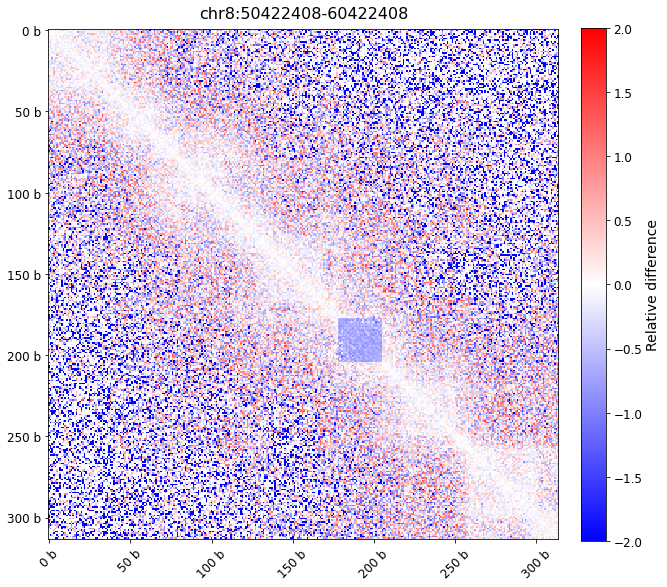

In [15]:
f, axs = plt.subplots(figsize=(10, 10),
                      nrows=1,
                      ncols=1,
                      sharex=True, sharey=False)
ax = axs
vmax = np.nanmax(abs(diff_rel))
im = ax.matshow(diff_rel,
                vmax=vmax,
                vmin=-vmax,
                cmap='bwr')
plt.colorbar(im, fraction=0.046, pad=0.04, label='Relative difference', ax=ax)
ax.set_title(simulation.mat_region, y=1.01)
format_ticks(ax)